In [1]:
# Imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import statsmodels.api as sm
from statsmodels.formula.api import ols

#sklearn imports
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

import patsy
%matplotlib inline
# y, X = patsy.dmatrices(formula, data=diamonds, return_type='dataframe')

## Load Data

In [90]:
# Loads in the data
df = pd.read_csv('./data/train.csv')
df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [91]:
# Sets display options in pandas
pd.set_option('display.min_rows', 200)


In [92]:
# Checks for null values
df.isna().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

## EDA / Cleaning

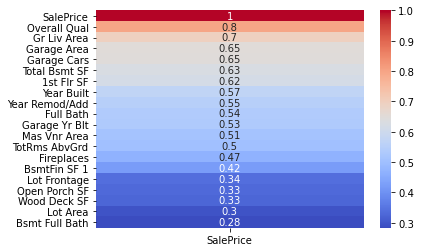

In [93]:
# Creates a heatmap to show the top 20 positively correlated features to the sale price target variable
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).head(20),
            annot=True, cmap='coolwarm');
plt.savefig('./presentation/imgs/heatmap_corr.jpg', bbox_inches = 'tight')

*A heatmap that shows the top 20 features that are highly positively correlated with the target variable ~ Sale Price*

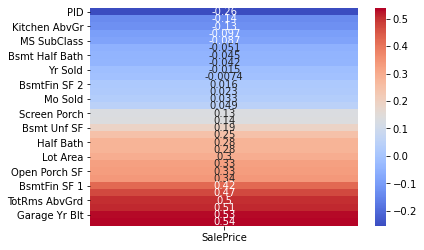

In [94]:
# Shows a heatmap of the lowest correlated or negatively correlated features to the target sale price variable
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice').head(30),
            annot=True, cmap='coolwarm');

*A heatmap that shows the bottom 30 features that are negatively correlated with the target variable.  Though, there are no variables that show a strong negative correlation*

#### Some cleaning and transformations

In [96]:
# cleans the names of the columns by taking out the space in between the words in column names
df.columns = df.columns.str.replace(' ', '')

In [97]:
# Log transforms two variables that were seen in the EDA to be right skewed
df['ln_GrLivArea'] = np.log(df['GrLivArea'])
df['ln_LotArea'] = np.log(df['LotArea'])

In [98]:
# prints out summary statistics of all the numerical values 
df.describe()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,ln_GrLivArea,ln_LotArea
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609,7.260884,9.092686
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352,0.321787,0.501142
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,5.811141,7.170120
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000,7.029087,8.922658
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000,7.275172,9.151651
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,7.455009,9.351276
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000,8.637994,11.976659


In [99]:
# Prints out the summary statistics of the feature of interest = Lot Area
df['LotArea'].describe()

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: LotArea, dtype: float64

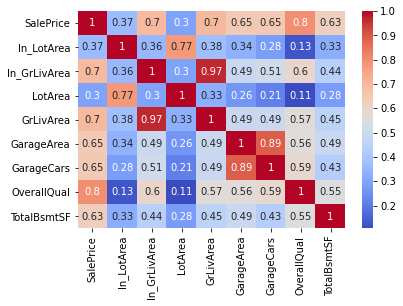

In [100]:
# Creates a heatmap between a few of the numerical variables to pull out any multicollinearity between numerical features
sns.heatmap(df[['SalePrice', 'ln_LotArea', 'ln_GrLivArea', 'LotArea', 'GrLivArea', 'GarageArea', 'GarageCars',
                'OverallQual', 'TotalBsmtSF']].corr(), annot=True, cmap='coolwarm');

*A heatmap between numerical features of interest based on the heatmap with sale price*

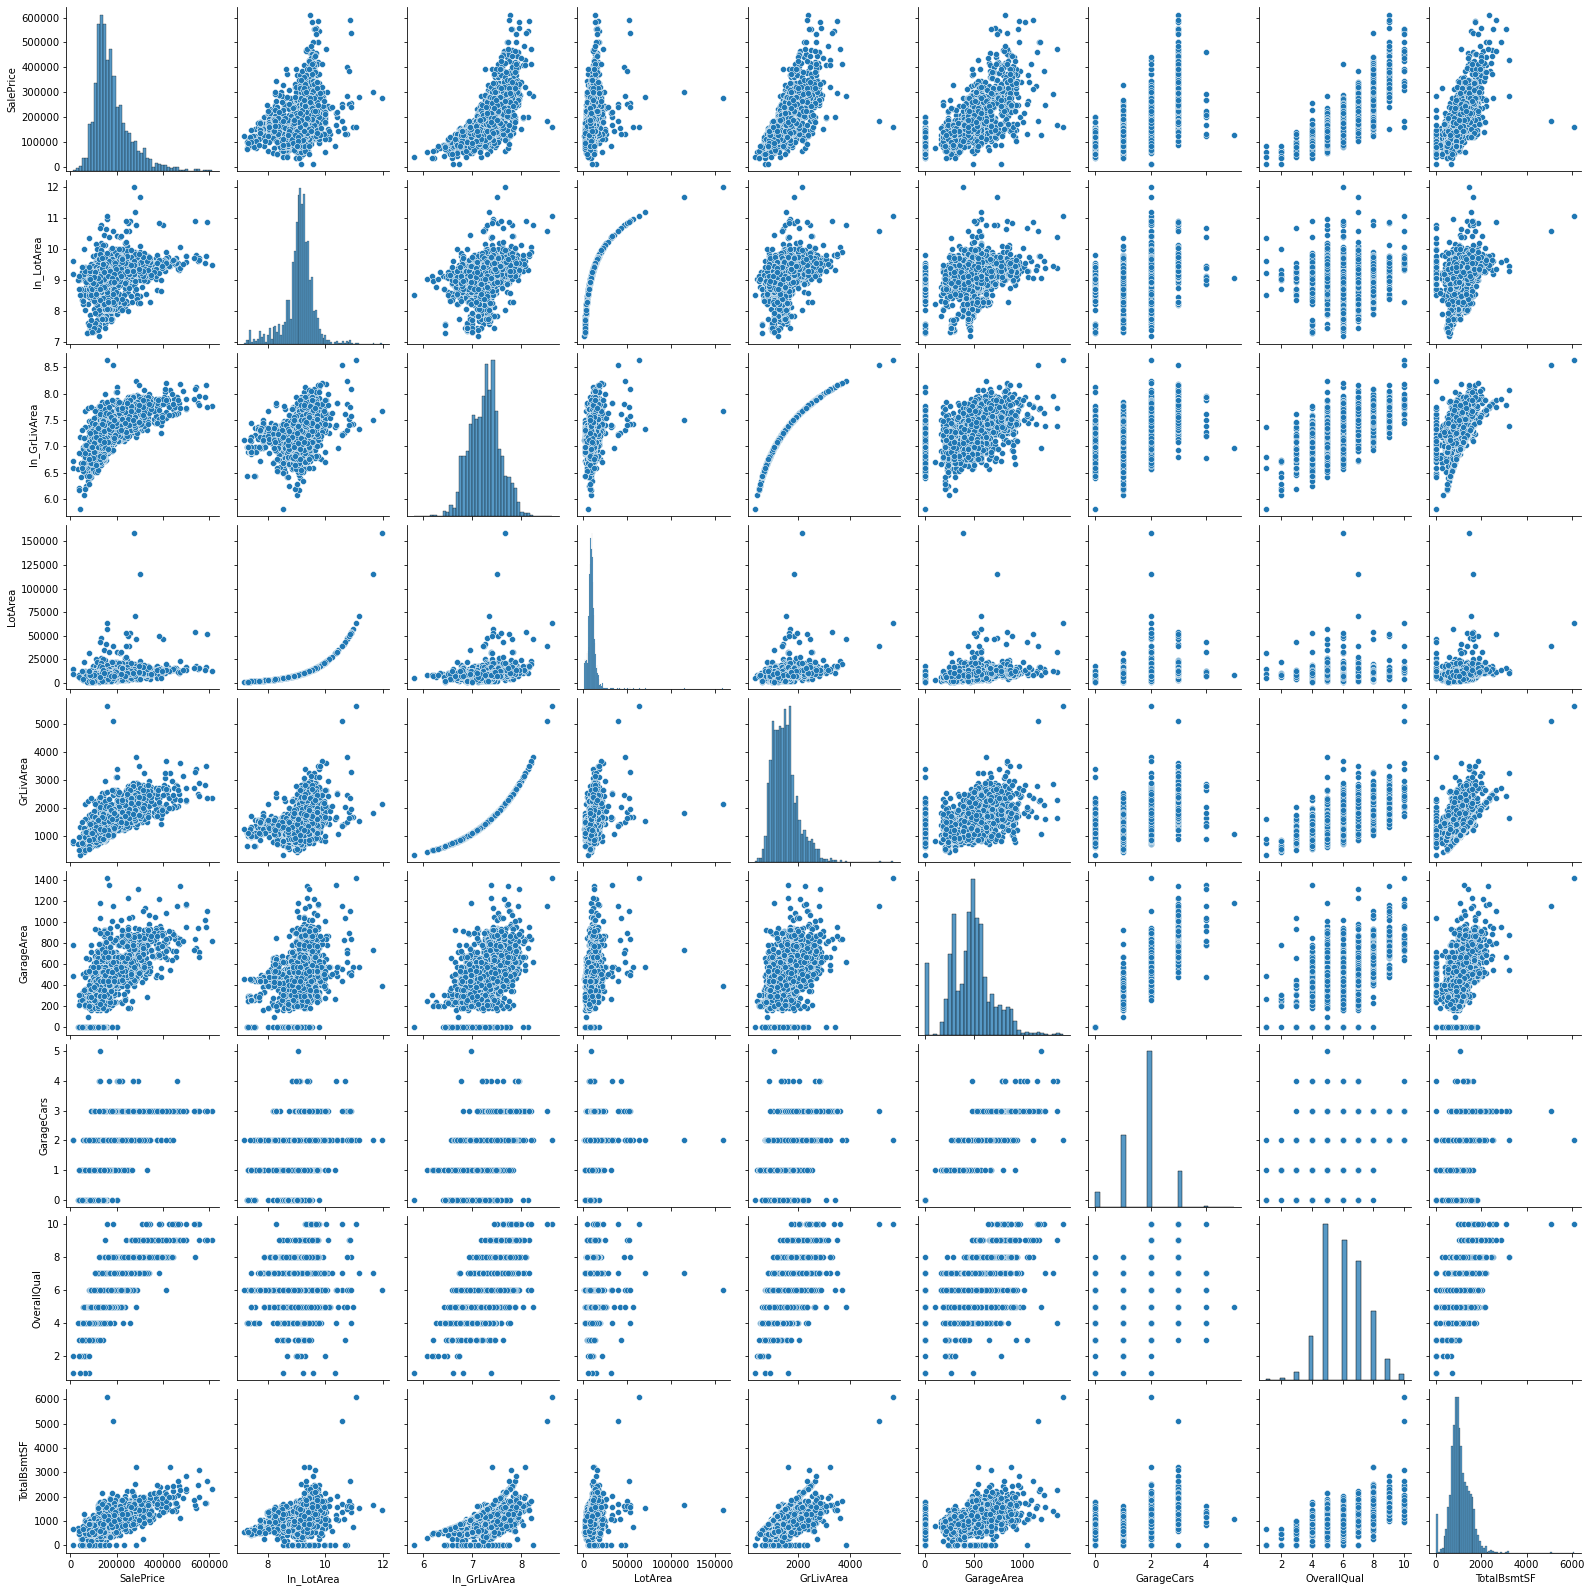

In [101]:
# Takes those same variables from the above heat map and visualizes them in a pairplot
sns.pairplot(df[['SalePrice', 'ln_LotArea', 'ln_GrLivArea', 'LotArea',
                 'GrLivArea', 'GarageArea', 'GarageCars', 
                 'OverallQual', 'TotalBsmtSF']]);

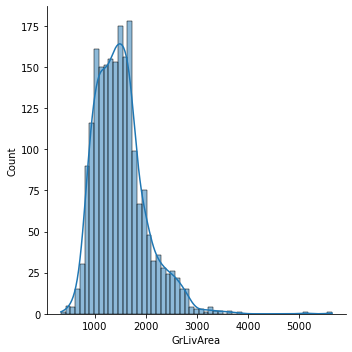

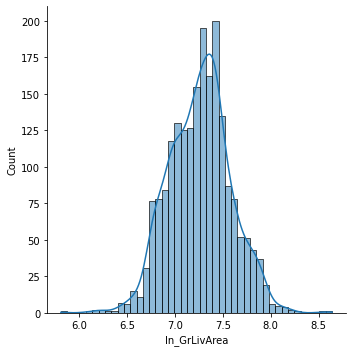

In [103]:
# Shows the distribution of the GrLivArea features to assess whether it is normally distributed or not.  If not it is log transformed and another 
# distribution is printed to check 

sns.displot(x='GrLivArea', data=df, kde=True)
plt.savefig('./presentation/imgs/hist_GrLivArea.jpg', bbox_inches = 'tight')
sns.displot(x='ln_GrLivArea', data=df, kde=True);
plt.savefig('./presentation/imgs/hist_ln_GrLivArea.jpg', bbox_inches = 'tight')

*GrLivArea was successfully transformed to a more normal distribution after it was log transformed*

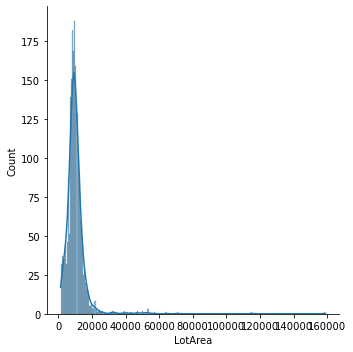

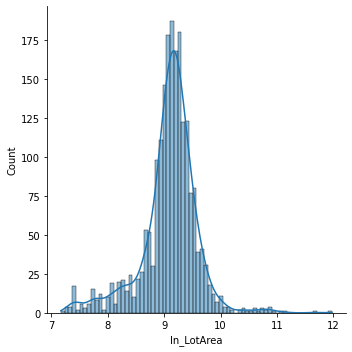

In [104]:
# Checks the distribution of another feature of interest: LotArea and log transforms if it is right skewed
sns.displot(x='LotArea', data=df, kde=True)
plt.savefig('./presentation/imgs/hist_LotArea.jpg', bbox_inches = 'tight')
sns.displot(x='ln_LotArea', data=df, kde=True)
plt.savefig('./presentation/imgs/hist_ln_LotArea.jpg', bbox_inches = 'tight');

*LotArea variable was successfully made into a normal distribution after log transforming the feature*

In [105]:
# Looks at the values in MSZoning
df['MSZoning'].value_counts(dropna=False)

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MSZoning, dtype: int64

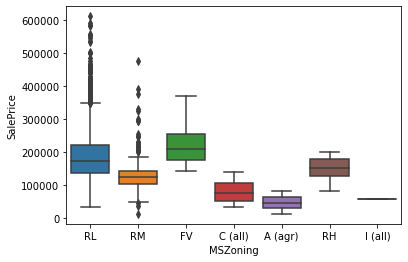

In [106]:
# Creates a box plot of the MSZoning classes to see its effects on Sale Price
sns.boxplot(x='MSZoning', y='SalePrice', data=df); 

*There is some varied effect on Sale Price due to the different classes in MSZoning. Based on these boxplots these variable may or may not improve predictive power of the model*

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

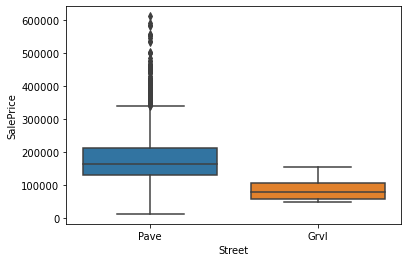

In [107]:
# Checks class distributions of Street feature
df['Street'].value_counts()
sns.boxplot(x='Street', y='SalePrice', data=df)

*There are not enough observations in each class to show a big effect on the Sale Price*

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

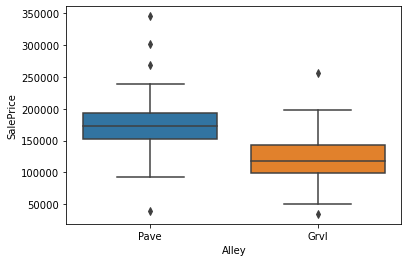

In [109]:
# Checks class distribution of the Alley feature
df['Alley'].value_counts(dropna=False)
sns.boxplot(x='Alley', y='SalePrice', data=df)

*There is some difference in effect on Sale Price but it's not large, so this feature may not necessarily increase the predictive power of the model.  In addition there are two many NAs in this feature, and not enough observations*

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

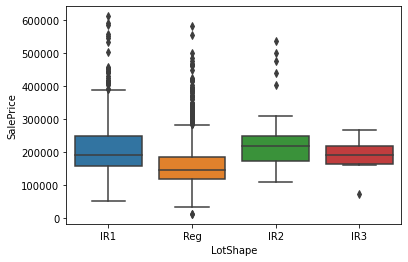

In [110]:
# Check the classes distribution of LotShape
df['LotShape'].value_counts(dropna=False)
sns.boxplot(x=df['LotShape'], y=df['SalePrice'])

*Not enough variation in the different class's effect on Sale Price.  Will not use for the model*

In [111]:
# Checks unique counts of LandContour classes
df['LandContour'].value_counts(dropna=False)

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: LandContour, dtype: int64

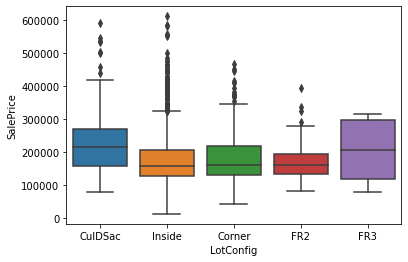

In [113]:
# Checks unique counts of LotConfig classes and their distributions
df['LotConfig'].value_counts(dropna=False)
sns.boxplot(x='LotConfig', y='SalePrice', data=df);

*Not enough variability in effect on Sale Price to improve predicions*

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

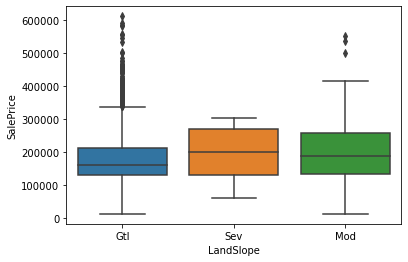

In [115]:
# Checks class distribution of the LandSlope feature
df['LandSlope'].value_counts(dropna=False)
sns.boxplot(x='LandSlope', y='SalePrice', data=df)

*Not enough observations in the 'Mod' and 'Sev' class to use in model and improve predictions*

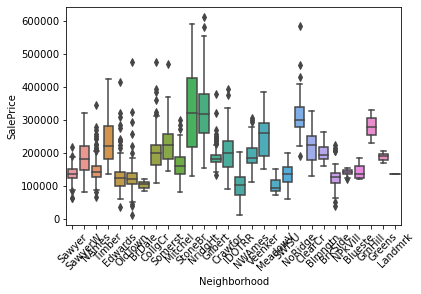

In [117]:
# Checks each type of neighborhood and its distribution
df['Neighborhood'].value_counts(dropna=False)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45);
plt.savefig('./presentation/imgs/nhood_boxplot.jpg', bbox_inches = 'tight')

*It's clear that the neighborhood affects the price of a house seen in this boxplot and the variability of each boxplot.  THis will be a good predictor to add into my model*

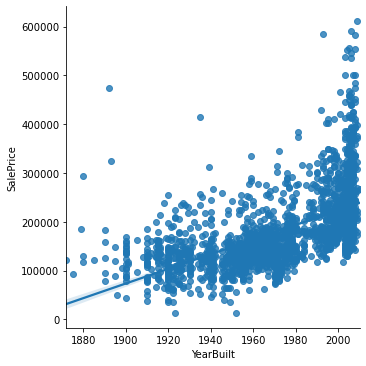

In [31]:
sns.lmplot(x='YearBuilt', y='SalePrice', data=df)
plt.savefig('./presentation/imgs/YearBuilt_Price.jpg')

*This graph shows that the YearBuilt has some bearing on the Sale Price of the house.  I will use this feature in my model*

In [32]:
df['YearRemod/Add'].value_counts(dropna=False)

1950    262
2006    139
2007    123
2005    100
2004     83
2000     69
2003     68
2002     59
2008     55
1998     51
1999     46
1996     42
1994     41
1995     38
2001     35
1993     33
1976     32
1970     31
1977     31
1978     30
1997     29
1958     28
1968     28
1975     26
1990     23
2009     23
1956     22
1967     22
1972     21
1959     21
       ... 
1960     20
1980     20
1991     19
1992     19
1966     19
1963     19
1971     18
1965     18
1953     18
1955     18
1964     17
1961     17
1954     17
1979     16
1969     16
1957     15
1989     14
1973     13
1987     12
1984     12
1988     12
1974     10
1951     10
1985      9
1986      9
1952      9
2010      8
1983      7
1981      6
1982      3
Name: YearRemod/Add, Length: 61, dtype: int64

<AxesSubplot:xlabel='YearRemod/Add', ylabel='SalePrice'>

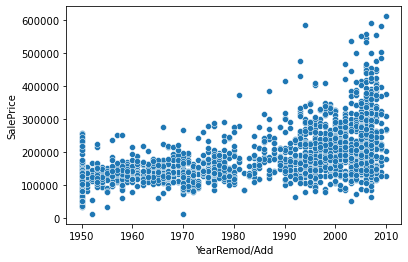

In [33]:
sns.scatterplot(x='YearRemod/Add', y='SalePrice', data=df)

*YearRemod/Add doesn't have a strong correlation to Sale Price. Will probably not use this variable on its own, in the model*

In [34]:
df['YearRemod-Built'] = df['YearRemod/Add'] - df['YearBuilt']

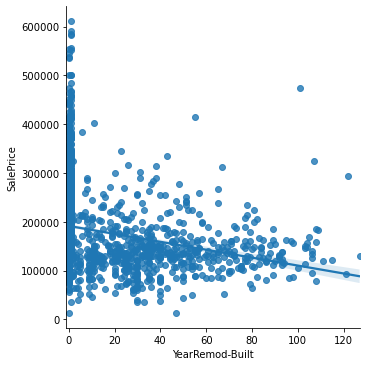

In [35]:
sns.lmplot(x='YearRemod-Built', y='SalePrice', data=df)

*Interesting to see that there is a slight negative correlation with the increase in time between building and remodeling of a house and its Sale Price. Perhaps if someone is willing to buy a house that has not been re-modeled yet, the sale price will be lower*

In [36]:
df['BldgType'].value_counts(dropna=False)

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: BldgType, dtype: int64

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

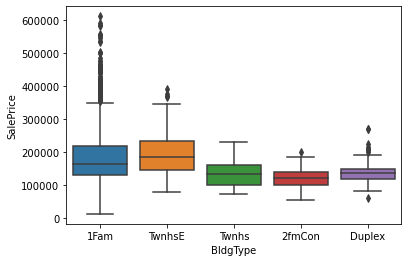

In [37]:
# sns.scatterplot(x='BldgType', y='SalePrice', data=df)
sns.boxplot(x='BldgType', y='SalePrice', data=df)

*Did not have a lot of variation to suggest it would increase the prediction of Sale Price. Therefore, this feature was not added into my model*

In [38]:
# Add but clean
df['RoofStyle'].value_counts(dropna=False)

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

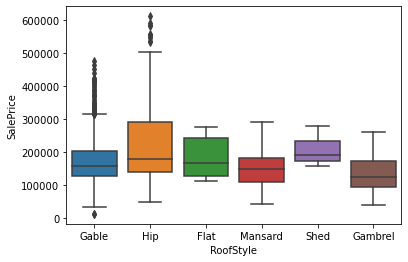

In [39]:
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)

*There was some variation among the different roof styles, so decided to add it to my model to see if it would have an effect, in which it did have a small effect*

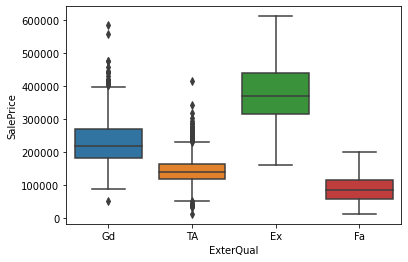

In [40]:
# Add but change to numbers because ordinal
sns.boxplot(x='ExterQual', y='SalePrice', data=df)
plt.savefig('./presentation/imgs/ExterQual_boxplot.jpg', bbox_inches = 'tight')

*There was variation based on the exterior quality classes, so I added this to my model where it did show it was significant*

In [41]:
df['ExterQual'].value_counts(dropna=False)

TA    1247
Gd     697
Ex      81
Fa      26
Name: ExterQual, dtype: int64

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

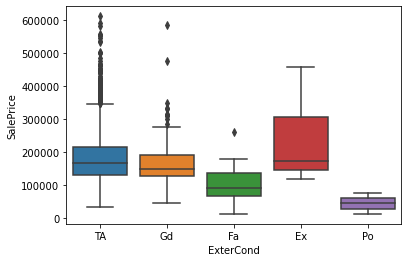

In [42]:
# drop
sns.boxplot(x='ExterCond', y='SalePrice', data=df)

*There is some variation in the exterior condition, but not sure if it's enough to have a large impact on Sale Price, but decided to add this as a variable later*

In [43]:
df['ExterCond'].value_counts(dropna=False)

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: ExterCond, dtype: int64

TA     887
Gd     864
Ex     184
Fa      60
NaN     55
Po       1
Name: BsmtQual, dtype: int64

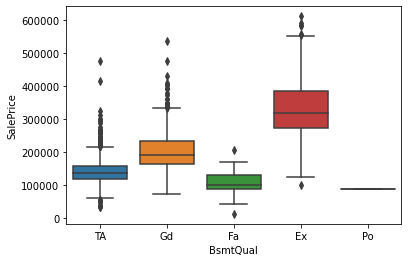

In [44]:
# Add but change to numbers
sns.boxplot(x='BsmtQual', y='SalePrice', data=df)
df['BsmtQual'].value_counts(dropna=False)

*There does some to be variation based off of the Basement Quality, so I did include this feature in my model*

TA     1834
Gd       89
Fa       65
NaN      55
Po        5
Ex        3
Name: BsmtCond, dtype: int64

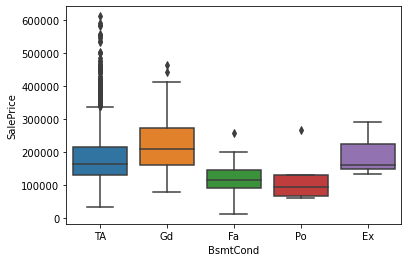

In [45]:
# don't add
sns.boxplot(x='BsmtCond', y='SalePrice', data=df)
df['BsmtCond'].value_counts(dropna=False)

*Though the boxplot shows some variation, there is class imbalance, with a majority of the observations are classified as 'TA' = Typical/Average*

No     1339
Av      288
Gd      203
Mn      163
NaN      58
Name: BsmtExposure, dtype: int64

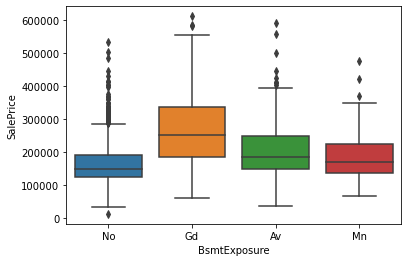

In [46]:
# maybe,
sns.boxplot(x='BsmtExposure', y='SalePrice', data=df)
df['BsmtExposure'].value_counts(dropna=False)

*Not enough variation was seen to add this feature into the model*

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
NaN     55
Name: BsmtFinType1, dtype: int64

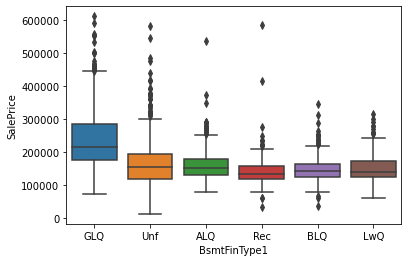

In [47]:
# Add so it can be interacted with BsmtFin SF 1
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=df)
df['BsmtFinType1'].value_counts(dropna=False)

*There doesn't seem to be a huge correlation or effect on the Sale price based on the different classes, but there may be a relationship between this feature and the Basemet Finished Square Feet feature, and so will keep this variable here for interactions.*

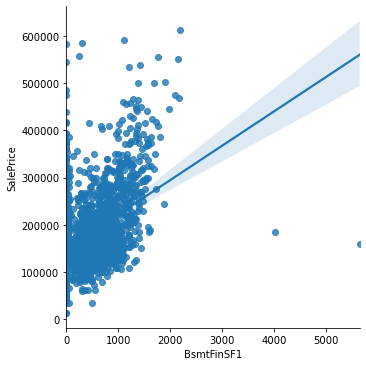

In [48]:
df['BsmtFinSF1'].isna().sum()
# sns.displot(x='BsmtFinSF1', data=df)
sns.lmplot(x='BsmtFinSF1', y='SalePrice', data=df)

*There is somewhat of a correlation between this basement feature and Sale Price.  I will add this feature into my model as well as create an interaction variable between this and the BsmtFinType1 variable*

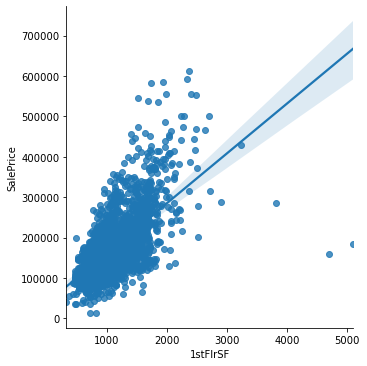

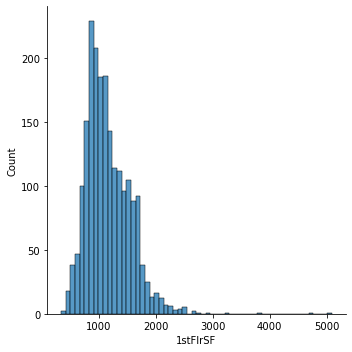

In [49]:
sns.lmplot(x='1stFlrSF', y='SalePrice', data=df);
sns.displot(x='1stFlrSF', data=df)

*Saw that the 1stFlrSF was right skewed and so decided to perform some trasnformations but ultimately log transforming the feature did not have a large impact on predictive power of my model*

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: HeatingQC, dtype: int64

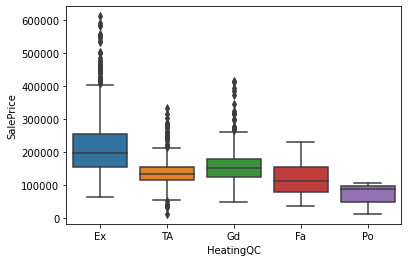

In [50]:
# Add but clean/change to numbers because ordinal
sns.boxplot(x='HeatingQC', y='SalePrice',data=df)
df['HeatingQC'].value_counts(dropna=False)

*There did seem to be some variance associated with the classes in the Heating quality and condition, so I decided to add this feature to my  model, and did discover that it was significant*

Y    1910
N     141
Name: CentralAir, dtype: int64

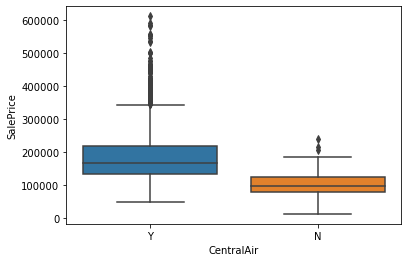

In [51]:
sns.boxplot(x='CentralAir', y='SalePrice', data=df)
df['CentralAir'].value_counts(dropna=False)

*the number of Y observations greatly outnumbered the number of N observations.  This means that there may not be a large effect on predicitve power using this feature*

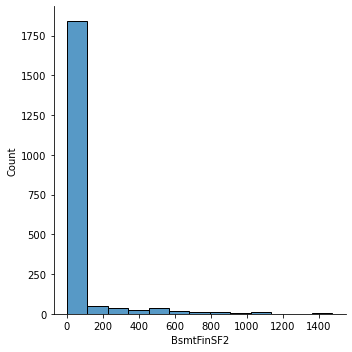

In [52]:
# Can add so that it can become an interaction, but for nan values, use median
sns.displot(x=df['BsmtFinSF2'])

*Too right skewed to show a strong enough predictive effect on the Sale Price*

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='BsmtUnfSF'>

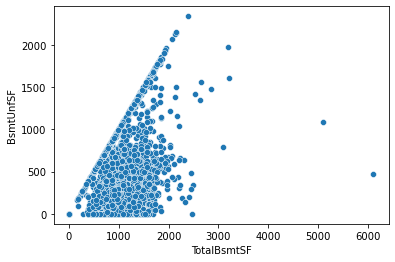

In [53]:
sns.scatterplot(x='TotalBsmtSF', y='BsmtUnfSF', data=df)

*Interestingly, there seems to be a threshold or percentage at which the percent of unfinished square feet in the basement does not go above a certain percentage of the Total basement square feet.  May be interesting to do an interaction variable between these two features*

TA    1047
Gd     806
Ex     151
Fa      47
Name: KitchenQual, dtype: int64

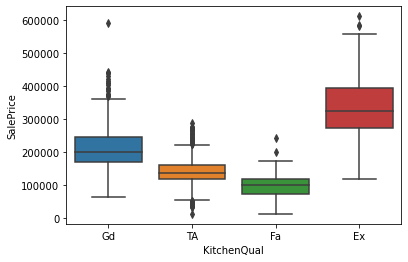

In [54]:
sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
df['KitchenQual'].value_counts(dropna=False)

*There was definitely variance in the classes within KitchenQual and therefore, it was significant in the model*

count    2051.000000
mean        2.843491
std         0.826618
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

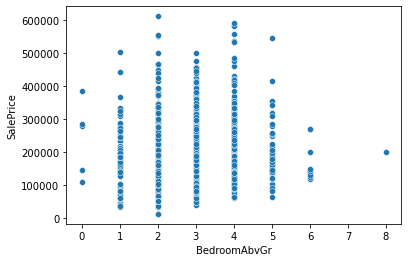

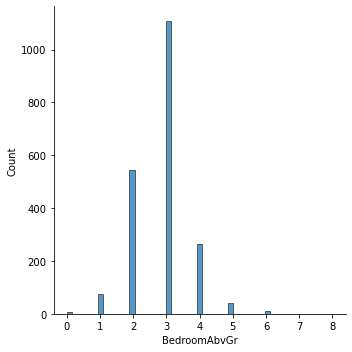

In [55]:
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=df)
sns.displot(x='BedroomAbvGr', data=df)
df['BedroomAbvGr'].describe()

*A generally normally distributed feature, without a clear effect on the Sale Price.*

count    2051.000000
mean        1.577279
std         0.549279
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: FullBath, dtype: float64

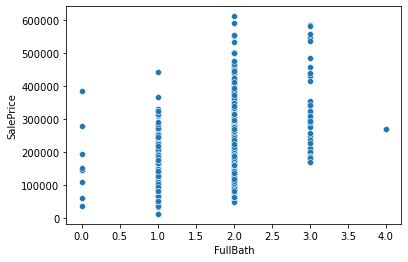

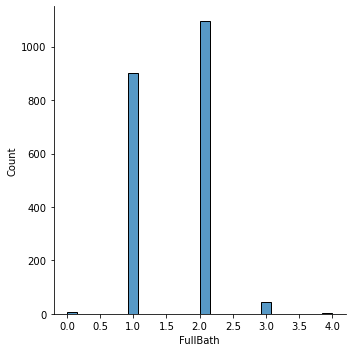

In [56]:
sns.scatterplot(x='FullBath', y='SalePrice', data=df)
sns.displot(x='FullBath', data=df)
df['FullBath'].describe()

*A generally normally distributed feature, with a slight positive correlation to the Sale Price*

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='FullBath'>

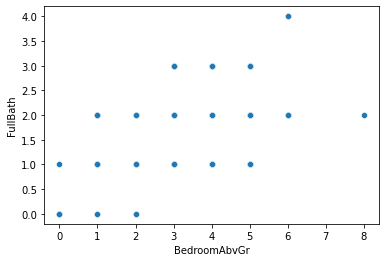

In [57]:
sns.scatterplot(x='BedroomAbvGr', y='FullBath', data=df)

*Together these two variables seem to have a slight positive correlation or relationship, which would make me consider creating an interaction variable between these two features to enhance Sale Price predictions*

count    2051.000000
mean        0.590931
std         0.638516
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64

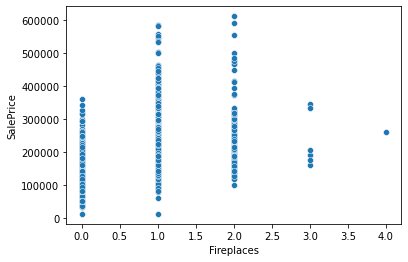

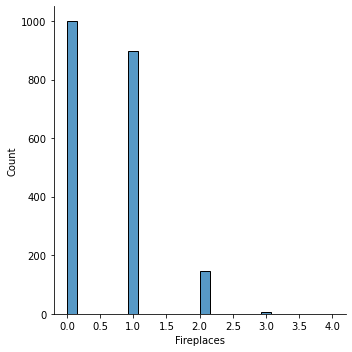

In [58]:
sns.scatterplot(x='Fireplaces', y='SalePrice', data=df)
sns.displot(x='Fireplaces', data=df)
df['Fireplaces'].describe()

*A slightly right skewed distribution for the number of fireplaces, with some type of relationship with Sale Price, made me add this feature to my model to see its effect and significance*

NaN    1000
Gd      523
TA      407
Fa       59
Ex       31
Po       31
Name: FireplaceQu, dtype: int64

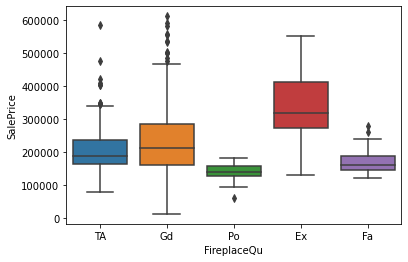

In [59]:
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df)
df['FireplaceQu'].value_counts(dropna=False)

*There does seem to be variance between the difference classes with Fireplace quality feature so I decided to include this feature into my model*

## Cleaning Data

In [60]:
# nhood_count = pd.DataFrame(df['Neighborhood'].value_counts(dropna=False))
# nhood_filter = list(nhood_count[nhood_count['Neighborhood'] < 20].index)
# nhood_filter
nhood_filter = ['Blueste', 'Greens', 'GrnHill', 'Landmrk']
df['Neighborhood'] = np.where(df['Neighborhood'].isin(nhood_filter), 'Other_nhood', df['Neighborhood'])

In [61]:
# Get neighborhood dummies 
nhood_dummies = pd.get_dummies(df['Neighborhood'], drop_first=True)
nhood_dummies
df = pd.concat([df, nhood_dummies], axis=1)
df

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,NridgHt,OldTown,Other_nhood,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,0,0
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,0,0,0,0,0,0,0,0
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,0,0,0,0
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,1,0,0,0,0,0,0,0,0
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# creates a list of the dummy variable names for neighborhood
nhood_features = list(nhood_dummies.columns)

In [63]:
# fills GarageArea NA with median
df['GarageArea'].fillna(df['GarageArea'].median(), inplace=True)

In [64]:
# fills TotalBsmtSF NA with median
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace=True)

In [65]:
# Creates a new variable of Yearbuilt squared
df['YearBuilt_squ'] = df['YearBuilt']**2
df['YearBuilt_squ']

0       3904576
1       3984016
2       3814209
3       4024036
4       3610000
5       3865156
6       4020025
7       3837681
8       3810304
9       3876961
10      3884841
11      4020025
12      3534400
13      3996001
14      4028049
15      4016016
16      3671056
17      3853369
18      3908529
19      4036081
20      3873024
21      4000000
22      4020025
23      3968064
24      3822025
25      3845521
26      3861225
27      3751969
28      3591025
29      3798601
         ...   
2021    4020025
2022    3876961
2023    4020025
2024    3916441
2025    4024036
2026    3713329
2027    3841600
2028    3873024
2029    4028049
2030    3610000
2031    3884841
2032    3908529
2033    3956121
2034    3988009
2035    3694084
2036    4024036
2037    3896676
2038    3861225
2039    3880900
2040    3814209
2041    4012009
2042    3694084
2043    3759721
2044    3980025
2045    4032064
2046    4028049
2047    3763600
2048    3717184
2049    3825936
2050    3996001
Name: YearBuilt_squ, Len

In [66]:
# Creates a new variable that finds the time in years between the year a house was built and the year it was remodeled
df['YearRemod-Built'] = df['YearRemod/Add'] - df['YearBuilt']

In [67]:
# Creates the roofstyle dummy variables
df['RoofStyle'] = np.where(df['RoofStyle'].isin(['Flat', 'Gambrel', 'Mansard', 'Shed']), 'Other_roof', df['RoofStyle'])
roof_dummies = pd.get_dummies(df['RoofStyle'], drop_first=True)
df = pd.concat([df, roof_dummies], axis=1)
roof_features = list(roof_dummies.columns)

In [68]:
# Turns ExterQual into ordinal numbers
df['ExterQual'] = df['ExterQual'].map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [69]:
# Turns bsmtqual into ordinal numbers
f['BsmtQual'] = df['BsmtQual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [70]:
# Turns bsmtfintype1 into ordinal numbers
df['BsmtFinType1'] = df['BsmtFinType1'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [71]:
# Imputes the missing values in bsmtfinsf1 with the median since the median is usually used in the housing industry
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median(), inplace=True)

In [72]:
# Creates a new interaction variable between bsmfintype1 and bsmtfinsf1
df['BsmtFinType1*BsmtFinSF1'] = df['BsmtFinType1'] * df['BsmtFinSF1']

In [73]:
# Turns bsmtfintype2 into ordinal numbers
df['BsmtFinType2'] = df['BsmtFinType2'].map({np.nan:0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [74]:
# Fills null values with the median because it's the housing industry which uses median
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].median(), inplace=True)

In [75]:
# Creates an interaction variable between bsmtfintype2 and bsmtfinsf2 features
df['BsmtFinType2*BsmtFinSF2'] = df['BsmtFinType2'] * df['BsmtFinSF2']

In [76]:
# log transforms the 1stFlrSF feature
df['ln_1stFlrSF'] = np.log(df['1stFlrSF'])

In [77]:
# turns heatingqc into ordinal numbers
df['HeatingQC'] = df['HeatingQC'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [78]:
# turns centralair features into binary variable of 1s and 0s, where 1 is Yes, and 0 is No
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N': 0})

In [79]:
# Creates an interaction variable between heatingqc and centralair
df['HeatingQC*CentralAir'] = df['HeatingQC'] * df['CentralAir']

In [81]:
# fills null values in bsmtUnfSF with median since that is what the housing industry uses
df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].median(), inplace=True)

In [82]:
# creates an interaction term between the totalbsmtsf and the bsmtunfsf features
df['TotalBsmtSF*BsmtUnfSF'] = df['TotalBsmtSF'] * df['BsmtUnfSF']

In [83]:
# turns kitchenqual into ordinal numbers
df['KitchenQual'] = df['KitchenQual'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

In [84]:
# Creates an interaction variable between bedroomabvgr and fullbath
df['BedroomAbvGr*FullBath'] = df['BedroomAbvGr'] * df['FullBath']

In [118]:
# turns fireplacequ into ordinal numbers
df['FireplaceQu'] = df['FireplaceQu'].map({np.nan:0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

### After some data cleaning, these are the variables I plan to input into my model

In [86]:
# keep_list for the variables that were highly correlated to Sale Price as shown in the heatmap at the beginning of this notebook
keep_corr_w_target = 'ln_LotArea + ln_GrLivArea + GarageArea + OverallQual + TotalBsmtSF'.split(' + ')
keep_corr_w_target

['ln_LotArea', 'ln_GrLivArea', 'GarageArea', 'OverallQual', 'TotalBsmtSF']

In [87]:
# Creates a list of the variables that I am keeping and that I will be putting into my models
keep_list = keep_corr_w_target + nhood_features + ['YearBuilt_squ', 'YearRemod-Built', 'ExterQual', 
                                                   'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1',
                                                   'BsmtFinType1*BsmtFinSF1', '1stFlrSF',
                                                   'HeatingQC', 'BsmtFinType2', 'BsmtFinSF2',
                                                   'BsmtFinType2*BsmtFinSF2', 'BsmtUnfSF', 
                                                   'TotalBsmtSF*BsmtUnfSF', 'KitchenQual',
                                                   'BedroomAbvGr', 'FullBath', 'BedroomAbvGr*FullBath',
                                                   'Fireplaces', 'FireplaceQu'] + roof_features
keep_list
# Took out ln_1stFlrSF, CentralAir, and HeatingQC*CentralAir because not significant

['ln_LotArea',
 'ln_GrLivArea',
 'GarageArea',
 'OverallQual',
 'TotalBsmtSF',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'Other_nhood',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 'YearBuilt_squ',
 'YearRemod-Built',
 'ExterQual',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType1*BsmtFinSF1',
 '1stFlrSF',
 'HeatingQC',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtFinType2*BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF*BsmtUnfSF',
 'KitchenQual',
 'BedroomAbvGr',
 'FullBath',
 'BedroomAbvGr*FullBath',
 'Fireplaces',
 'FireplaceQu',
 'Hip',
 'Other_roof']

In [88]:
# drop list # variables that I will not include in model
drop_list = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
            'LotConfig', 'LandSlope']

In [89]:
# exports the clean trained dataframe into a csv file so that it can be imported into my modeling notebooks
df.to_csv('./data/train_clean.csv', index=False)